In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

from tqdm import tqdm

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision
from torchvision import transforms
from sklearn.metrics import f1_score

C:\Users\swwho\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 지정된 프로시저를 찾을 수 없습니다
  warn(f"Failed to load image Python extension: {e}")


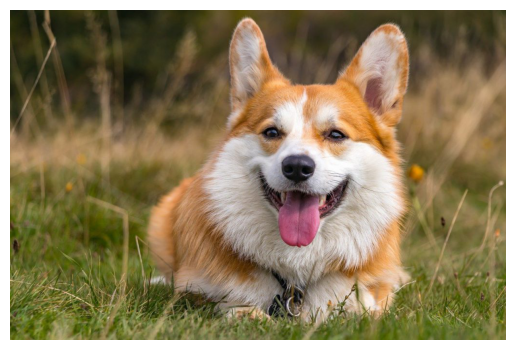

In [2]:
PATH = './data/'

img = Image.open(PATH+'dogs/dog_1.jpg')
plt.axis('off')
plt.imshow(img)

## 데이터 전처리

In [3]:
datas = []
labels = []
for i in range(1, 11):
    img1 = Image.open(PATH+f'dogs/dog_{i}.jpg')
    img2 = Image.open(PATH+f'cats/cat_{i}.jpg')
    datas.append(img1)
    datas.append(img2)
    labels.append(0) # dog
    labels.append(1) # cat
    
print('data size:', len(datas), 'label size:', len(labels))

data size: 20 label size: 20


## customdataset 정의

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [13]:
class dog_cat_dataset():
    def __init__(self, datas, labels, transform):
        self.datas = datas
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.datas)
    
    def __getitem__(self, idx):
        img = self.datas[idx]
        img = self.transform(img)
        label = self.labels[idx]
        return img, label

In [14]:
train_data = dog_cat_dataset(datas, labels, transform=transform)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

## Model 정의

In [79]:
class Model(nn.Module):
    def __init__(self, classes=2):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.fc = nn.Linear(32*220*220, classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        # x = x.view(x.size(0), -1)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [91]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, 1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 32, 3, 1)
        self.bn3 = nn.BatchNorm2d(32)
        self.fc = nn.Linear(32*218*218, 16)

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.relu(self.bn3(self.conv3(x)))
        x = x.view(-1, 32*218*218)
        x = self.fc(x)
        return x

In [92]:
model = Model()

## Model Train

In [93]:
def train(train_dataloader):
    model.train()
    for epoch in range(1, 11):
        print('Epoch:', epoch)
        epoch_y = []
        epoch_output = []
        epoch_loss = 0
        for img, label in tqdm(train_dataloader):
            epoch_y += label
            # img = img.to(device), label.to(device)

            optimizer.zero_grad()

            output = model(img)
            _, preds = torch.max(output, axis=1)
            epoch_output += preds.to(device)
            loss = criterion(output, label)

            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        print('F1 score:', f1_score(epoch_y, epoch_output, average='macro'))

In [94]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [95]:
train(train_dataloader)

Epoch: 1


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.50s/it]


F1 score: 0.04884004884004884
Epoch: 2


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]


F1 score: 0.5238095238095238
Epoch: 3


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.62s/it]


F1 score: 0.3333333333333333
Epoch: 4


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]


F1 score: 0.3333333333333333
Epoch: 5


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.60s/it]


F1 score: 0.898989898989899
Epoch: 6


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.52s/it]


F1 score: 0.5238095238095238
Epoch: 7


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.55s/it]


F1 score: 0.7333333333333334
Epoch: 8


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


F1 score: 0.949874686716792
Epoch: 9


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.45s/it]


F1 score: 0.898989898989899
Epoch: 10


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.87s/it]

F1 score: 0.898989898989899


## 모델 확인

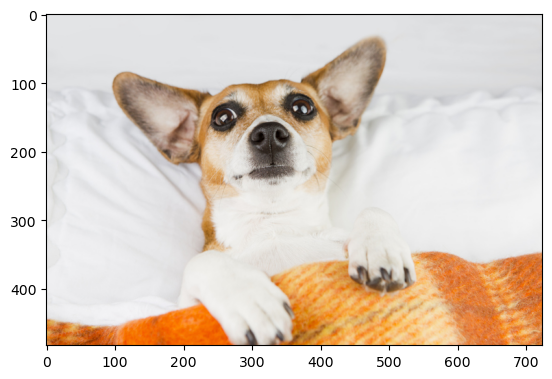

In [100]:
test_img = Image.open('./data/test/test_dog.jpg')
plt.imshow(test_img)

In [124]:
classes = {0:'dog', 1:'cat'}
test_img = Image.open('./data/test/test_dog.jpg')
test_img = transform(test_img)
test_output = model(test_img.unsqueeze(0))
test_output
_, test_output = torch.max(test_output, axis=1)
print(classes[test_output.item()])

dog


cat


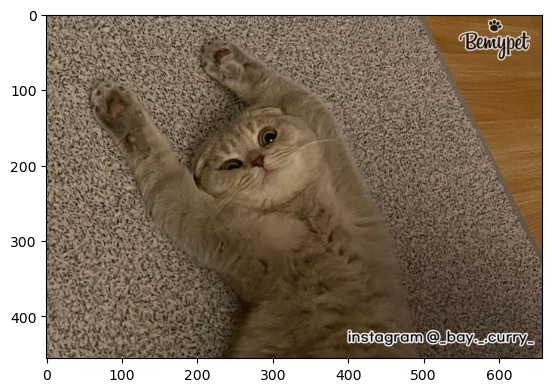

In [126]:
test_img = Image.open('./data/test/test_cat.png')
plt.imshow(test_img)

test_img = transform(test_img)
test_output = model(test_img.unsqueeze(0))
test_output
_, test_output = torch.max(test_output, axis=1)
print(classes[test_output.item()])